<a href="https://colab.research.google.com/github/srisai-murari/Phishguard/blob/main/phish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Phishing Website Detection by Machine Learning Techniques**

*Final project of AI & Cybersecurity Course*

In [ ]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Loading the data
data0 = pd.read_csv('/content/dataset_full.csv')
data0.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [ ]:
#Checking the shape of the dataset
data0.shape

(88647, 112)

In [ ]:
#Listing the features of the dataset
data0.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [ ]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


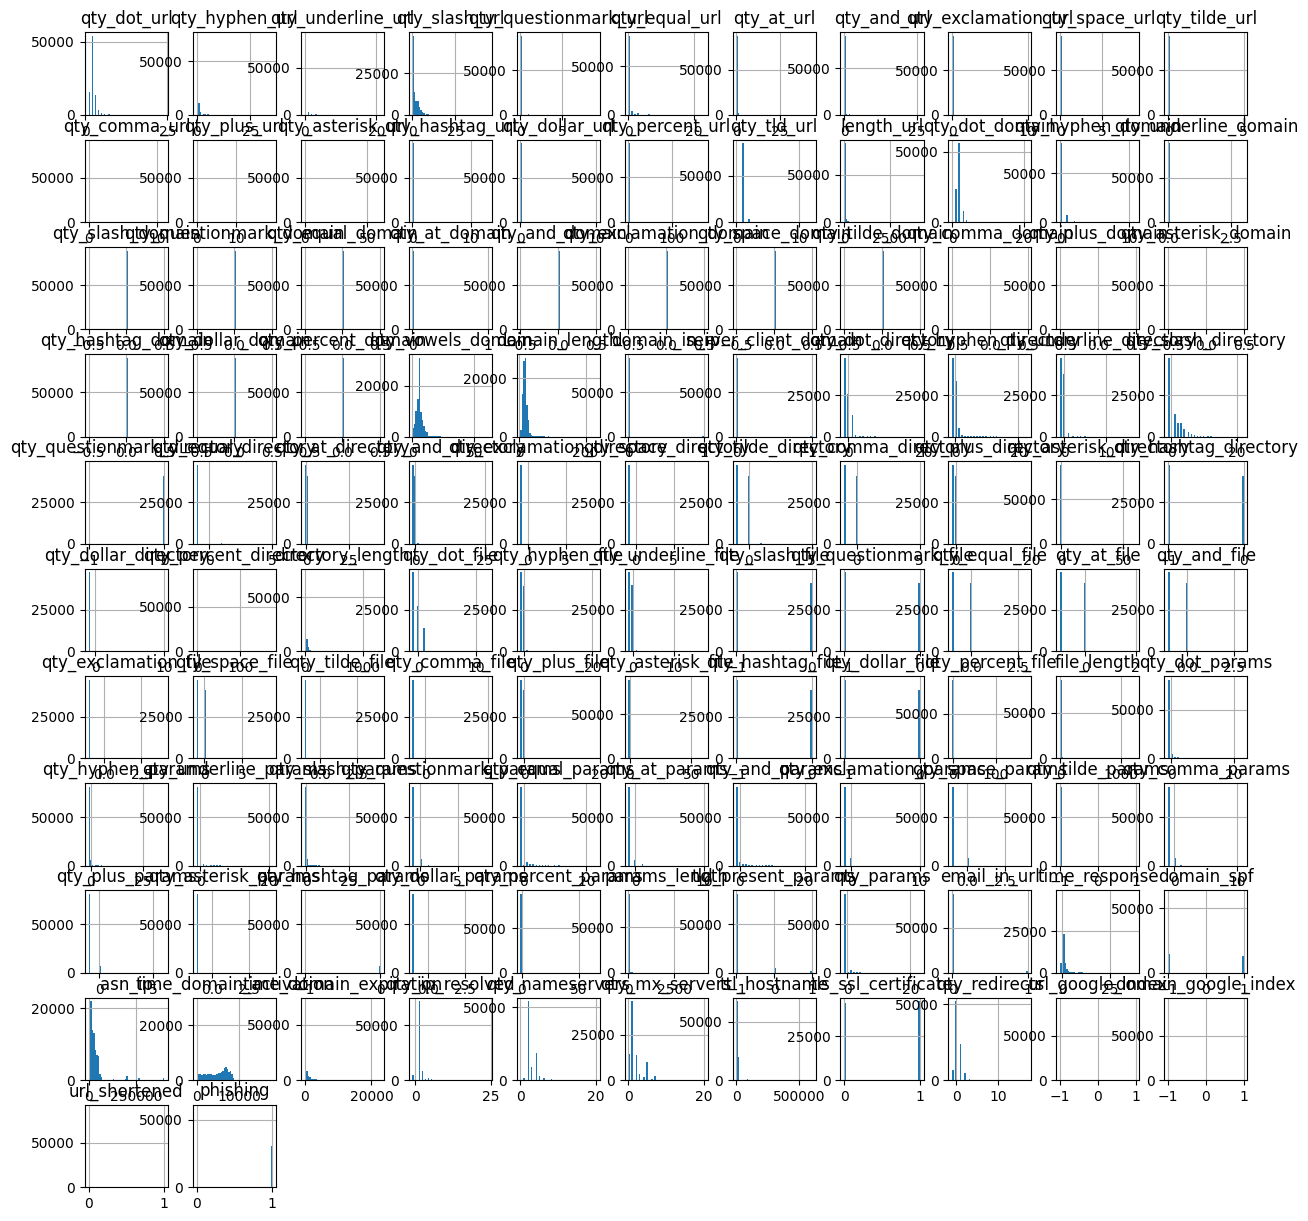

In [ ]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

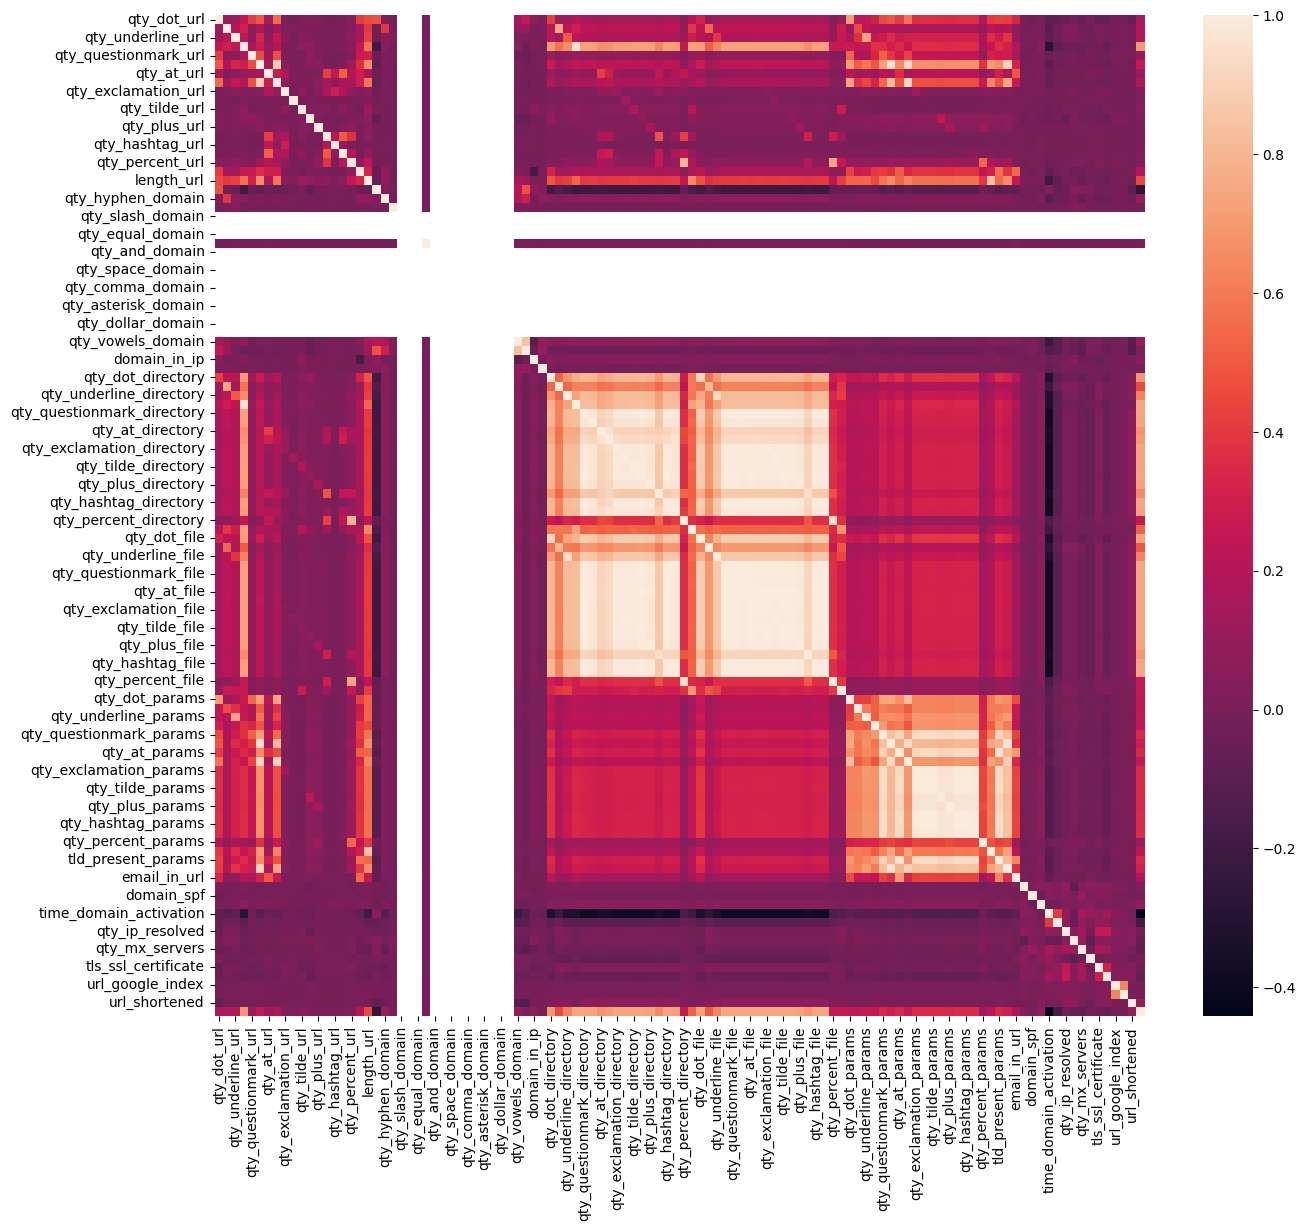

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
data0.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


This leaves us with 16 features & a target column. The *'URL_Depth'* maximum value is 20. According to my understanding, there is no necessity to change this column.

In [ ]:
#checking the data for null or missing values
data = pd.read_csv('/content/dataset_full.csv')
data.isnull().sum()

,0
qty_dot_url,0
qty_hyphen_url,0
qty_underline_url,0
qty_slash_url,0
qty_questionmark_url,0
...,...
qty_redirects,0
url_google_index,0
domain_google_index,0
url_shortened,0


In [ ]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,2,1,291,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,-1,2,0,-1,0,-1,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,1,2,1,14391,1,1,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,1,4,1,7434,0,0,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,1,2,1,299,0,0,0,0,0,0


## **6. Splitting the Data**

In [ ]:
 #Sepratating & assigning features and target columns to X & y
y = data0['phishing']  # Use the correct column name
x = data0.drop('phishing', axis=1)  # Drop the target column to get the features

x.shape, y.shape  # Confirm the shapes of X and y


((88647, 111), (88647,))

# New section

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)
x_train.shape, x_test.shape

((70917, 111), (17730, 111))

In [ ]:
#importing packages
from sklearn.metrics import accuracy_score

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [ ]:
# Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# instantiate the model
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(x_test)
y_train_tree = tree.predict(x_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.933
Decision Tree: Accuracy on test Data: 0.928


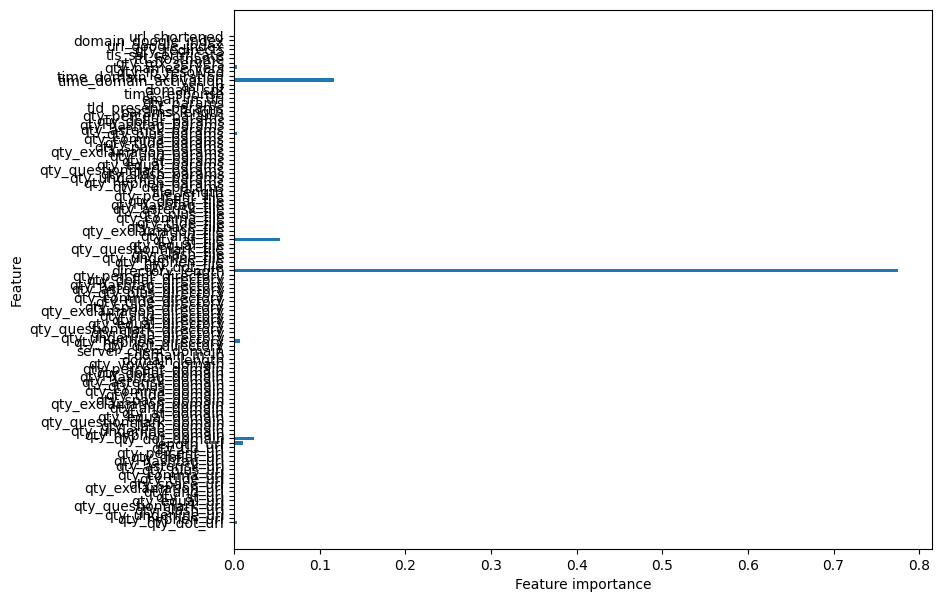

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

In [ ]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(x_test)
y_train_forest = forest.predict(x_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.919
Random forest: Accuracy on test Data: 0.915


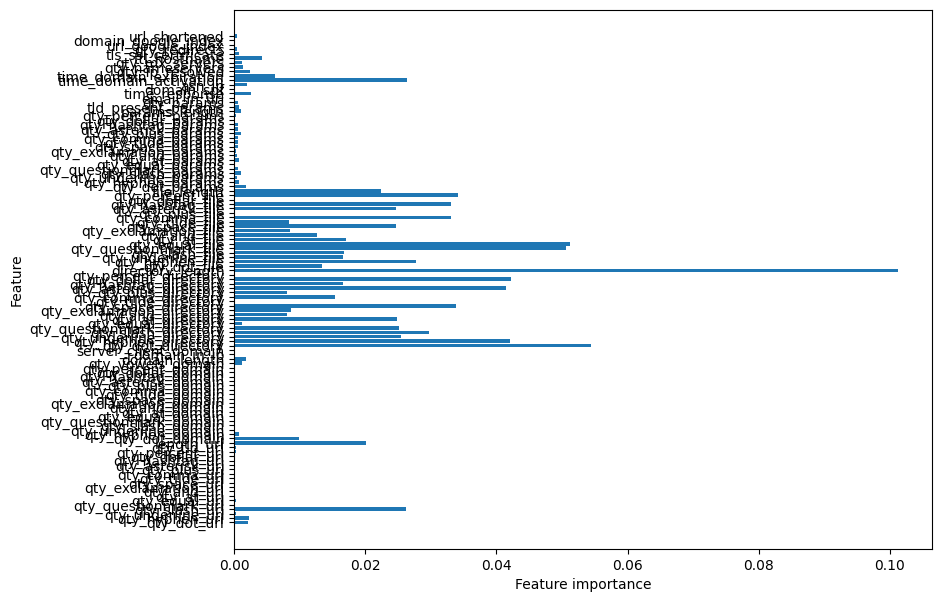

In [ ]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = x_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

In [ ]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(x_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(x_test)
y_train_mlp = mlp.predict(x_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.915
Multilayer Perceptrons: Accuracy on test Data: 0.915


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

In [ ]:
y_train_attribute = pd.Series(y_train_mlp).map({1: 0, 2: 1}).values
#XGBoost Classification model
from xgboost import XGBClassifier
import xgboost as xgb

xgb_model = XGBClassifier(learning_rate=0.4,max_depth=7,objective='binary:logistic')


# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

#fit the model using adjusted y_train
xgb.fit(x_train, y_train_mlp)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# New section

In [ ]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(x_test)
y_train_xgb = xgb.predict(x_train)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.915
XGBoost : Accuracy on test Data: 0.914


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [ ]:
#importing required packages
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
#building autoencoder model

input_dim = x_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 111)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 111)                 │          12,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 111)                 │          12,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 109)                 │          12,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 111)                 │          12,210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 111)                 │          12,432 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,714 (241.07 KB)

 Trainable params: 61,714 (241.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

#Training the model
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3091 - loss: -2814.2922 - val_accuracy: 0.8479 - val_loss: -4947.4004
Epoch 2/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8578 - loss: -4944.8281 - val_accuracy: 0.8479 - val_loss: -4951.2739
Epoch 3/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8536 - loss: -4948.8052 - val_accuracy: 0.8479 - val_loss: -4951.5127
Epoch 4/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8552 - loss: -4929.3374 - val_accuracy: 0.8479 - val_loss: -4951.5273
Epoch 5/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8466 - loss: -4939.4321 - val_accuracy: 0.0000e+00 - val_loss: -4951.4268
Epoch 6/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0000e+00 - loss: -4893.0898 - val_accuracy: 0.0000e+00 - val_loss: -4951.4282
Epoch 7/10
887/887 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0000e+00 - loss: -4907.4697 - val_accuracy: 0.0000e+00 - val_loss: -4951.4282
Epoch 8/10
887/887 ━━━━━━━━━

**Performance Evaluation:**

In [ ]:
acc_train_auto = autoencoder.evaluate(x_train, x_train)[1]
acc_test_auto = autoencoder.evaluate(x_test, x_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(acc_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(acc_test_auto))

2217/2217 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: -4930.4512
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0000e+00 - loss: -4823.2012

Autoencoder: Accuracy on training Data: 0.000
Autoencoder: Accuracy on test Data: 0.000


**Storing the results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', acc_train_auto, acc_test_auto)

In [ ]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.933,0.928
1,Random Forest,0.919,0.915
2,Multilayer Perceptrons,0.915,0.915
3,XGBoost,0.915,0.914
4,AutoEncoder,0.000,0.000


In [ ]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.933,0.928
1,Random Forest,0.919,0.915
2,Multilayer Perceptrons,0.915,0.915
3,XGBoost,0.915,0.914
4,AutoEncoder,0.000,0.000


In [ ]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))
pickle.dump(mlp, open("MLPClassifier.pickle.dat", "wb"))
pickle.dump(tree, open("DecisionTreeClassifier.pickle.dat", "wb"))
pickle.dump(forest, open("RandomForestClassifier.pickle.dat", "wb"))
pickle.dump(history, open("AutoEncoder.pickle.dat", "wb"))

**Testing the saved model:**

In [ ]:
# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model=pickle.load(open("MLPClassifier.pickle.dat","rb"))
loaded_model=pickle.load(open("DecisionTreeClassifier.pickle.dat","rb"))
loaded_model=pickle.load(open("RandomForestClassifier.pickle.dat","rb"))
loaded_model=pickle.load(open("AutoEncoder.pickle.dat","rb"))

In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
# Streamlit UI
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# ... (import other necessary libraries and models)

# Load your trained models
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model=pickle.load(open("MLPClassifier.pickle.dat","rb"))
loaded_model=pickle.load(open("DecisionTreeClassifier.pickle.dat","rb"))
loaded_model=pickle.load(open("RandomForestClassifier.pickle.dat","rb"))
loaded_model=pickle.load(open("AutoEncoder.pickle.dat","rb"))
st.title("Phishing Website Detection")

# Model selection
model_choice = st.selectbox("Choose a model:",
                           ["Decision Tree", "Random Forest",
                            "Multilayer Perceptrons", "XGBoost",
                            "Autoencoder"])

# Input features (binary thresholded)
feature_values = []
x_binary = x.copy()
for col in x_binary.columns:
    value = st.number_input(f"{col} (0 or 1)", min_value=0, max_value=1, value=0)
    feature_values.append(value)

# Prediction button
if st.button("Predict"):
    if model_choice == "Decision Tree":
        model = tree
    elif model_choice == "Random Forest":
        model = forest
    elif model_choice == "Multilayer Perceptrons":
        model = mlp
    elif model_choice == "XGBoost":
        model=xgb
    elif model_choice =="Autoencoder":
        model_choice=history
    # Model Performance Visualization
    st.subheader("Model Performance")

    # Example: Bar chart for accuracy
    fig, ax = plt.subplots()
    models = ["Decision Tree", "Random Forest", ...]  # List your models
    train_accuracies = [acc_train_tree, acc_train_forest, ...]  # Corresponding training accuracies
    test_accuracies = [acc_test_tree, acc_test_forest, ...]  # Corresponding test accuracies
    ax.bar(models, train_accuracies, label="Train Accuracy")
    ax.bar(models, test_accuracies, label="Test Accuracy")
    ax.set_ylabel("Accuracy")
    ax.set_xlabel("Model")
    ax.legend()
    st.pyplot(fig)

    # Pie chart for prediction distribution
    st.subheader("Prediction Distribution")
    labels = ["Safe", "Phishing"]
    sizes = [1 - prediction[0], prediction[0]]  # Assuming prediction is a single-element array
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    st.pyplot(fig1)

    # Make prediction
    prediction = model.predict([feature_values])

    # Display prediction
    if prediction == 1:
        st.error("This website is likely a phishing site.")
    else:
        st.success("This website is likely safe.")

Writing app.py


In [ ]:
!ngrok authtoken 2lWDYvG1PtFeP2DCOuuLcwCVYMH_uDtMwNZGLvRtG9MnhB7w

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok http 8501

http - start an HTTP tunnel

USAGE:
  ngrok http [address:port | port] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080                        # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --domain mydomain.com                           # run ngrok with your own custom domain
  ngrok http 80 --allow-cidr 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions
  Upgrade your a

In [ ]:
!ngrok start--all

ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

AUTHOR:
  ngrok - <support@ngrok.com>

COMMANDS: 
  config          update or migrate ngrok's configuration file
  http            start an HTTP tunnel
  tcp             start a TCP tunnel
  tunnel          start a tunnel for use with a tunnel-group backend

EXAMPLES: 
  ngrok http 80                                                 # secure public URL for port 80 web server
  ngrok http --domain baz.ngrok.dev 8080                        # port 8080 available at baz.ngrok.dev
  ngrok tcp 22                                                  # tunnel arbitrary TCP traffic to port 22
  ngrok http 80 --oauth=google --oauth-allow-email=foo@foo.com  # secure your app with oauth

Paid Features: 
  ngrok http 80 --domain mydomain.com                           # run ngrok with your own custom domain
  ngrok http 80 --allow-cidr 2600:8c00::a03c:91ee:fe69:9695/32  # run ngrok with IP policy restrictions

In [ ]:
from pyngrok import ngrok
from pyngrok.exception import PyngrokNgrokError

try:
    # Attempt to start an ngrok tunnel
    url = ngrok.connect(port='8501')
    print(f"Your app is running at: {url}")
except PyngrokNgrokError as e:
    print(f"Error starting ngrok: {e}")
    print("Please check if another ngrok session is already running or if your account allows multiple sessions.")


Error starting ngrok: ngrok client exception, API returned 400: {"error_code":102,"status_code":400,"msg":"invalid tunnel configuration","details":{"err":"yaml: unmarshal errors:\n  line 1: field port not found in type config.HTTPv2Tunnel"}}

Please check if another ngrok session is already running or if your account allows multiple sessions.


In [ ]:
!streamlit run app.py --server.port 8081




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8081
  Network URL: http://172.28.0.12:8081
  External URL: http://35.231.236.209:8081



In [ ]:
! streamlit

/bin/bash: line 1: streamlit: command not found
